In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Generating Unbalanced Data

In [2]:
X, y = make_classification(n_classes=3, weights=[0.02,0.13,0.85],n_features=10, 
                           n_clusters_per_class=1, n_samples=3000, random_state=0)
print('Original Data : {}'.format(sorted(Counter(y).items())))

Original Data : [(0, 66), (1, 393), (2, 2541)]


# SMOTE
**S**ynthetic **M**inority **O**versampling **TE**chnique

* Process
    1. 소수클래스 $x_i$에 대한 k-neighbors $S_i$ 생성 (단, $S_i$는 소수클래스에 속한 obs)
    2. 새로운 표본 $x_{syn}$는 $x_{syn} = x_i + \lambda(x_k - x_i)$ for $x_k \in S_i$, $\lambda$ ~ U(0,1)

* Parameters
    * ratio : 'minority', 'majority', 'not minority', 'all', 'auto' 중 resample에 이용할 그룹 설정. default='auto'
        * over-sampling의 경우 'majority'는 사용불가.
    * k_neighbors : 합성 표본을 생성할 때 이용할 nearest neighbors의 갯수 설정. default=5
    * kind : 'regular', 'borderline1', 'borderline2', 'svm' 중 이용할 알고리즘 설정. default='regular'

In [3]:
sm_auto = SMOTE(ratio = 'auto')
sm_minority = SMOTE(ratio = 'minority')
sm_notminority = SMOTE(ratio = 'not minority')

X_sm_auto, y_sm_auto = sm_auto.fit_resample(X, y)
X_sm_min, y_sm_min = sm_minority.fit_resample(X, y)
X_sm_notm, y_sm_notm = sm_notminority.fit_resample(X, y)

pd.DataFrame({'SMOTE_Class 0':[dict(Counter(y_sm_auto))[0],dict(Counter(y_sm_min))[0],dict(Counter(y_sm_notm))[0]],
              'SMOTE_Class 1':[dict(Counter(y_sm_auto))[1],dict(Counter(y_sm_min))[1],dict(Counter(y_sm_notm))[1]],
              'SMOTE_Class 2':[dict(Counter(y_sm_auto))[2],dict(Counter(y_sm_min))[2],dict(Counter(y_sm_notm))[2]]},
             index=['auto','minority','not minority'])

,SMOTE_Class 0,SMOTE_Class 1,SMOTE_Class 2
auto,2541,2541,2541
minority,2541,393,2541
not minority,66,2541,2541


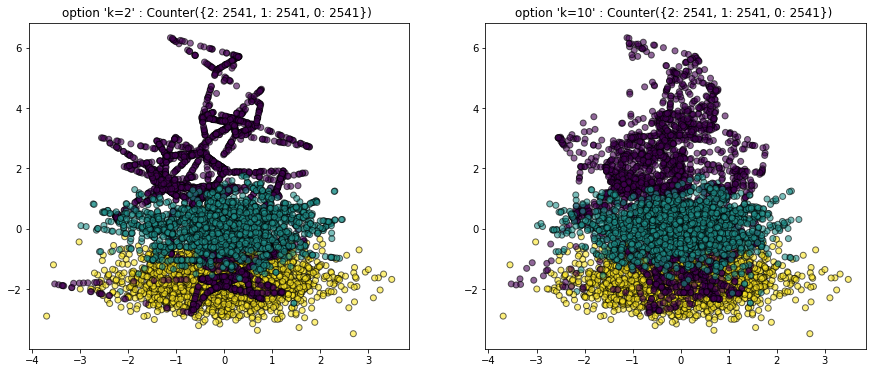

In [4]:
sm_2 = SMOTE(k_neighbors = 2)
sm_10 = SMOTE(k_neighbors = 10)

X_sm_2, y_sm_2=sm_2.fit_resample(X, y)
X_sm_10, y_sm_10=sm_10.fit_resample(X, y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.scatter(X_sm_2[:, 0], X_sm_2[:, 1], alpha = 0.6, c = y_sm_2, edgecolor = 'k')
ax1.set_title('''option 'k=2' : {} '''.format(Counter(y_sm_2)))

ax2.scatter(X_sm_10[:, 0], X_sm_10[:, 1], alpha = 0.6, c = y_sm_10, edgecolor = 'k')
ax2.set_title('''option 'k=10' : {} '''.format(Counter(y_sm_10)))
plt.show()

# ADASYN
**ADA**ptive **SYN**thetic sampling method
* SMOTE와 같은 방식이지만 $S_i$안에 있는 다수클래스 수에 비례하여 $x_{syn}$를 생성한다.
* SMOTE와 동일한 옵션

In [5]:
ada_auto = ADASYN(ratio = 'auto')
ada_minority = ADASYN(ratio = 'minority')
ada_notminority = ADASYN(ratio = 'not minority')

X_ada_auto, y_ada_auto = ada_auto.fit_resample(X, y)
X_ada_min, y_ada_min = ada_minority.fit_resample(X, y)
X_ada_notm, y_ada_notm = ada_notminority.fit_resample(X, y)

pd.DataFrame({'ADA_Class 0':[dict(Counter(y_ada_auto))[0],dict(Counter(y_ada_min))[0],dict(Counter(y_ada_notm))[0]],
              'ADA_Class 1':[dict(Counter(y_ada_auto))[1],dict(Counter(y_ada_min))[1],dict(Counter(y_ada_notm))[1]],
              'ADA_Class 2':[dict(Counter(y_ada_auto))[2],dict(Counter(y_ada_min))[2],dict(Counter(y_ada_notm))[2]]},
             index=['auto','minority','not minority'])

,ADA_Class 0,ADA_Class 1,ADA_Class 2
auto,2547,2555,2541
minority,2547,393,2541
not minority,66,2555,2541


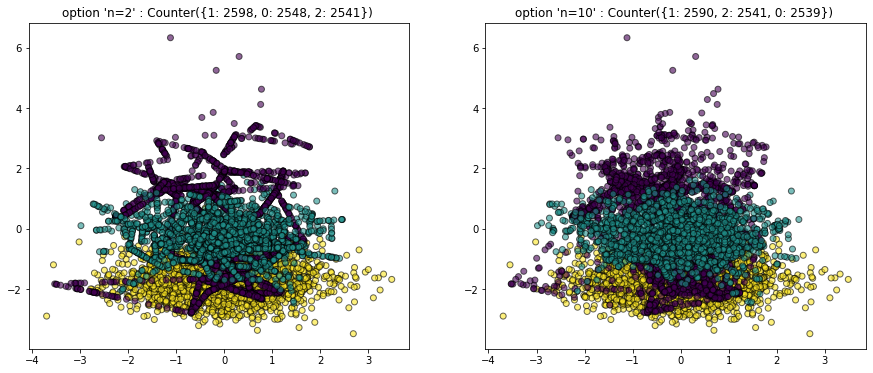

In [6]:
ada_2 = ADASYN(n_neighbors = 2)
ada_10 = ADASYN(n_neighbors = 10)

X_ada_2, y_ada_2 = ada_2.fit_resample(X, y)
X_ada_10, y_ada_10 = ada_10.fit_resample(X, y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.scatter(X_ada_2[:, 0], X_ada_2[:, 1], alpha = 0.6, c = y_ada_2, edgecolor = 'k')
ax1.set_title('''option 'n=2' : {} '''.format(Counter(y_ada_2)))
ax2.scatter(X_ada_10[:, 0], X_ada_10[:, 1], alpha = 0.6, c = y_ada_10, edgecolor = 'k')
ax2.set_title('''option 'n=10' : {} '''.format(Counter(y_ada_10)))
plt.show()

# Original, SMOTE, ADASYN 비교

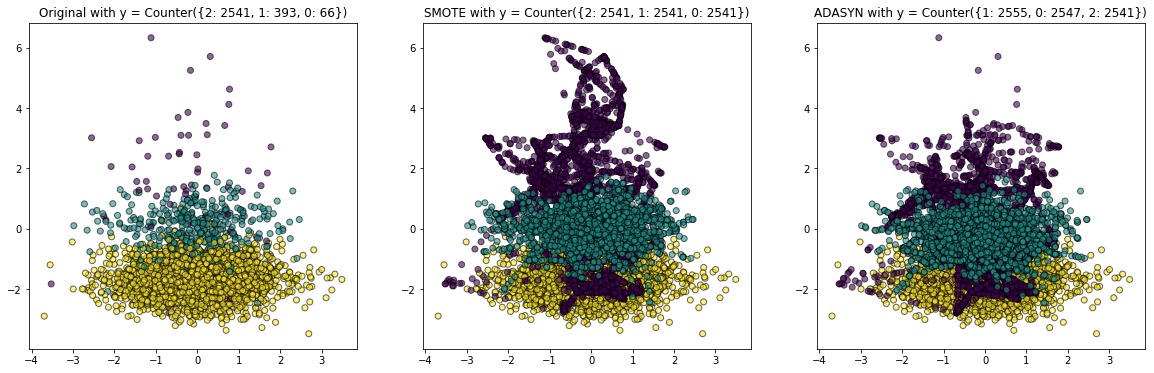

In [7]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 6))
ax_arr=(ax1, ax2, ax3)

sm = SMOTE(); ada=ADASYN()
X_sm, y_sm=sm.fit_resample(X,y)
X_ada, y_ada=ada.fit_resample(X,y)

data_init=(X,y); data_SMOTE=(X_sm, y_sm); data_ADASYN=(X_ada, y_ada)
data_arr=(data_init, data_SMOTE, data_ADASYN)
name_list=['Original','SMOTE','ADASYN']

for ax, data, name in zip(ax_arr, data_arr, name_list):
    ax.scatter(data[0][:, 0],data[0][:, 1], alpha=0.6, c=data[1], edgecolor='k')
    ax.set_title('{} with y = {}'.format(name, Counter(data[1])))